<a href="https://colab.research.google.com/github/albertoakel/Atividades_EBAC/blob/master/notebook/Teste_de_hipotese_exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Teste t de Student
---

**Objetivos** : Apresentar e exemplificar as etapas para realização do teste t-student.

---

O teste t de Student é uma ferramenta estatística que compara médias de grupos ou amostras. É usado para determinar se há uma diferença significativa entre os valores médios de amostras. Vamos iniciar com um problema simples, para uma amostra inicialmente e explorar algumas informações.

**Contexto:**\
Suponha que você tenha uma amostra de notas e queira testar o valor médio. Assim temos 3 situações: \
1) É menor que 7.0 ? \
2) É maior que 7.0 ? \
3) É Diferente de 7.0 ?

Para cada uma dessas situações, precisamos definir as hipoteses nulas e alternativas. Sendo assim, iremos realizar os passos inicialmente para o primeiro caso.

### 1) $\bar{x}$ < $H_o$

Vamos começar pensando no primeiro caso como exemplo, os demais, seguirão os mesmos passos lógicos.

**Passo 1: Definir as hipóteses:**
*   $H_o$: A média das notas é menor 7.0 (hipótese nula)
*   $H_1$A média das notas não é menor 7.0 (hipótese alternativa).

**Passo 2: Coletar os dados:** \
notas = [6.5, 7.2, 6.8, 7.5, 6.9, 7.1, 6.7, 7.4, 6.6, 7.3]

**Passo 3: Calcular teste t**:

*   Média das amostras($\bar{x}$);
*   Desvio Padrão das amostras (s); \

Como $\bar{x}$ = 7.0
e $s$ = 0.316 podemos calcular **teste-t**, assim:
$$t=\frac{( \bar{x}-\mu_o)\sqrt{\nu}}{s}$$
onde $\nu$ graus de liberdade ($\nu=n-1$). Por fim, encontramos t=-0.198

**Passo 4**: Calculo do P-Valor \
Como estamos buscando um valor menor que a $H_o$ nula, nosso P-valor é definido por:
$$P_{valor}= P(T\leqslant t)$$

Assim,com t=-0.198, chegamos que $$P_{valor}= P(T\leqslant -0.198)$$\
Nosso primeiro cálculo aqui é encontrar a probabilidade acumulada até o valor de t, assim encontrar $P(T\leqslant -0.198)$. Aqui temos que avaliar basicamente o somotário da distribuição t-student até o valor t. A figura 1
mostra graficamente o que isso representa.

In [3]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from IPython.display import display, Math
from scipy.stats import norm
from scipy.stats import t as ts



#1)-As médias das notas é significamente diferente de 7?
#Teste t de Student
#Ho as notas tem média 7
#Ha as notas são diferente de 7
notas=[6.5, 7.2, 6.8, 7.5, 6.9, 7.1, 6.7, 7.4, 6.6, 7.1];

muo=7
ho=7
#Calcular média e desvio das amostas
n=len(notas)
x_hat=np.mean(notas)
s=np.std(notas)



t=(x_hat-ho)/(s/np.sqrt(n))
df=n-1
p_valor = stats.t.cdf(t, df)

p_valor_N = norm.cdf(t)

'''
comentário extra.
Há diferenças nos valores entre a distribuição normal e t-student.
lembrando que t-student é mais adquada apara valores < 30.
À medida que os graus de liberdade aumentam, a distribuição t-Student se aproxima
da distribuição normal padrão. Para df>30, as curvas praticamente são as mesmas
'''

print('Média               :',x_hat)
print('Desvio padrão       :',s)
print('teste-t             :',t)
print('p-valor (t-student) :',p_valor)
print('p-valor (normal)    :',p_valor_N)
print('')
if p_valor > 0.05:
  print('Não há evidência estatística para concluir que a média das notas é significativamente menor que 7')
else:
  print('Rejeitamos a hipótese nula. Portanto, há evidências estatísticas para concluir que \n a média das notas é significativamente menor que 7')

Média               : 6.9799999999999995
Desvio padrão       : 0.3187475490101846
teste-t             : -0.19841894753314082
p-valor (t-student) : 0.42356347438919145
p-valor (normal)    : 0.4213586470795116

Não há evidência estatística para concluir que a média das notas é significativamente menor que 7


-1.8124611228107341


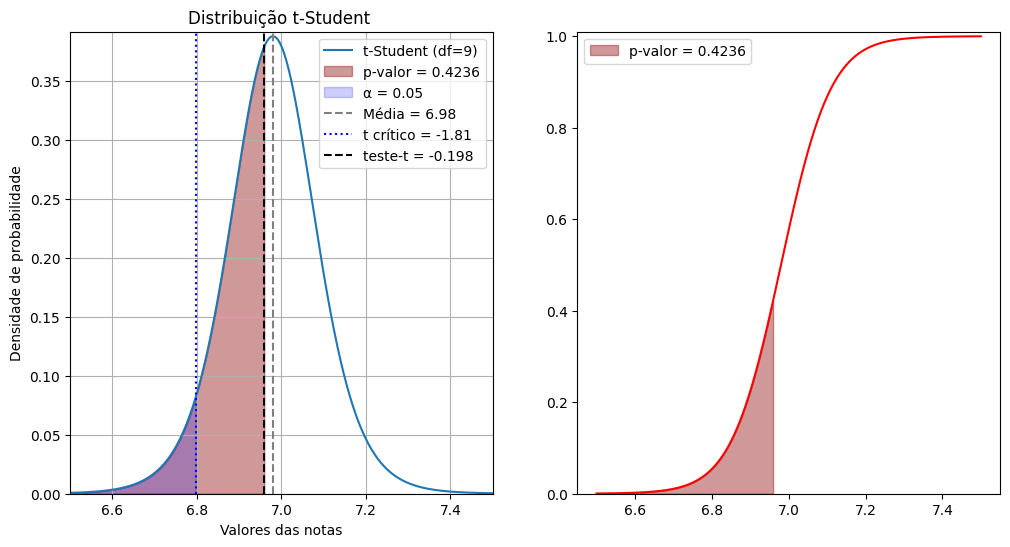

In [9]:
#x = np.linspace(-4,4,100)

#y=ts.pdf(x,10)
#c=norm.cdf(x,0,1)

# Intervalo das notas
x_min = min(notas)  # Valor mínimo das notas
x_max = max(notas)  # Valor máximo das notas
x = np.linspace(x_min, x_max, 1000)
alpha=0.05
t_critical = ts.ppf(alpha, 10)

# Gerar valores da distribuição t-Student ajustados ao eixo x
y = ts.pdf(  (x - x_hat) / (s / np.sqrt(n)), df)

c=ts.cdf( (x - x_hat) / (s / np.sqrt(n)), df)







fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(x, y, label=f"t-Student (df={df})")
ax[0].set_title('fig1: Distribuição t-student')

x_pvalor=x[x <= x_hat + t * (s / np.sqrt(n))]

# Preencher a área correspondente ao p-valor
ax[0].fill_between(x_pvalor, ts.pdf((x_pvalor - x_hat) / (s / np.sqrt(n)), df),
                   color='darkred', alpha=0.4, label=f"p-valor = {p_valor:.4f}")

# # Preencher a área correspondente ao nível de significância (α = 0.05)
alpha_x = x[x <= x_hat + t_critical * (s / np.sqrt(n))]
ax[0].fill_between(alpha_x, ts.pdf((alpha_x - x_hat) / (s / np.sqrt(n)), df),
                 color='blue', alpha=0.2,label=f"α = {alpha}")

#Linha vertical para a média das notas
ax[0].axvline(x_hat, color='gray', linestyle='--', label=f"Média = {x_hat:.2f}")

# # Linha vertical para o valor crítico de t
t_critical_x = x_hat + t_critical * (s / np.sqrt(n))
ax[0].axvline(t_critical_x, color='blue', linestyle=':', label=f"t crítico = {t_critical:.2f}")


# # Linha vertical para a estatística t calculada
t_value_x = x_hat + t * (s / np.sqrt(n))
ax[0].axvline(t_value_x, color='black', linestyle='--', label=f"teste-t = {t:.3f}")

# # Configurações do gráfico

ax[0].set_ylim(0, max(y)*1.01)
ax[0].set_xlim(x_min,x_max)
ax[0].set_title("Distribuição t-Student ")
ax[0].set_xlabel("Valores das notas")
ax[0].set_ylabel("Densidade de probabilidade")
ax[0].legend()
ax[0].grid()


# plt.show()








#ax[0].vlines(x=t,ymin=0,ymax=norm.pdf(t,0,1),color='gray',linestyles='dashed',
 #    label="mean: {:.1f}".format(t))

#ax[0].set_ylim(0, max(y)*1.01)
#ax[0].set_xlim(-4,4)
#condicao = (x <= 0) & (y <= norm.pdf(t,0,1))
#ax[0].fill_between(x, y,where=condicao,alpha=0.4);
#ax[0].set_xlabel(r'$\mu$')


ax[1].plot(x,c,'r-');
# ax[1].set_title('fig2:Distribuição acumulada')
# ax[1].vlines(x=t,ymin=0,ymax=p_valor,color='gray',linestyles='dashed',
#      label="mean: {:.1f}".format(t))
# ax[1].hlines(y=p_valor,xmin=-4,xmax=t,color='gray',linestyles='dashed',
#      label="mean: {:.1f}".format(t))
# ax[1].set_ylim(0, max(c)*1.01)
# ax[1].set_xlim(-4,4)
# #preenchimento da região
ax[1].fill_between(x, c,where=c <= p_valor,color='darkred', alpha=0.4, label=f"p-valor = {p_valor:.4f}");
ax[1].set_ylim(0, max(c)*1.01)
# ax[1].set_xlabel('teste estatítico');
# ax[1].set_ylabel('Valor-p');
ax[1].legend()
print(t_critical)

## Valor-p

O valor-p é como um "termômetro" que mede se algo que encontramos é  sorte ou se é algo realmente. Imagine que você faz um experimento e acha um resultado. O valor-p diz qual a chance desse resultado acontecer "do nada", sem que nada especial esteja acontecendo. Se essa chance for muito pequena (valor-p pequeno), a gente começa a achar que talvez não foi só sorte, e sim que algo diferente está rolando.

No teste de hipóteses, a gente tem duas ideias para comparar:

1.   Hipótese nula: nada de especial está acontecendo
2.   Hipótese alternativa : não é bem assim...o que está rolando.

A hipotese nula é a nossa preposição. É o que achamos sobre os dados ou  experimentos. Como saber se ela é resultado do acaso? **Um teste estatistico + valor-p** pode nos dar um caminho.
Dito isso, podemos dizer que o **valor-p é a probabilidade de um teste estatistico**. Ele é o delimitador no nivel de significância para rejeitar a hipotese nula. Por exemplo, um valor-p pequeno significa que a probabilidade é pequena considerando o teste estátistico, o que nos leva a rejeitar a hipótese nula.

Sendo redundante nas explicações, **A princípio, a hipótese nula é considerada a verdadeira. Ao confrontarmos a hipótese nula com os achados de uma amostra aleatória, verifica-se a sua plausibilidade o que nos leva a rejeitarmos ou não $H_o$**. Se não rejeitamos $H_o$, tomamo-la como verdadeira; caso contrário, tomamos $H_1$a como verdadeira.


### CÁLCULO VALOR-P
Dependendo da hipótese alternativa ($H_1$), o cálculo do p-valor pode ser feito de três formas: unilateral à esquerda, unilateral à direita e bicaudal. A seguir iremos apresentar as três situações e seus respectivos calculos.

### 1) Valor-P unilateral à esquerda ($H_1: \mu<\mu_o$)
Aqui, testamos se a média amostral ( $\bar{x}$) é significamente menor que a média hipotética ($\mu_o$). O p-valor é a probabilidade de obter um valor menor ou igual ao estatístico de teste. Matematicamente falando:

$$P_{valor}= P(T\leqslant t)$$

Assim, como nosso valor t=0, chegamos que $P_{valor}= P(T\leqslant 0)$. Nosso primeiro cálculo aqui é encontrar a probabilidade acumulada até o valor de t, assim encontrar $P(T\leqslant 0)$. Matematicamente estamos falando de uma expressão do tipo:
$$S(t)=\sum_{i=1}^{t} f(x_i)$$

Onde f(x) é nossa distribuição( seja ela qual for) e S(t) é nossa distribuição acumulada até o valor t definido.Nada tão complicado. As figuras 1 e 2 mostram os gráficos da distribuição e distribuição acumulada normalizada.

Em python a operação é bem simples, podemos usar o recurso de soma acumulada *np.cumsum* em nossa distribuição e encontrar nossa soma acumulada até o valor t=0. o código abaixo exemplifica esta tarefa.
```
y=norm.pdf(x,0,1)   # distribuição normal
c=np.cumsum(y)      
c=c/max(c)          # para normalizar os valores entre 0-1.
id=np.where(x>=t)   # para encontrar o indice de x que correspondente
temp=id[0][0]
print(c[temp])      #para imprimir o valor de C(t).
```

O exercicio vale a pena para entendimento dos processos, porém aqui faremos de forma mais objetiva e adotaremos alguns pacotes do módulo **scipy.stats, como norm.cdf que executa exatamente a mesma coisa**.


---

**Observação**: *A distribuição t-Student é semelhante à distribuição normal, mas tem caudas mais pesadas, especialmente quando o número de graus de liberdade($\nu< 30$ é pequeno. À medida que os grau de liberdade aumentam, a distribuição t-Student se aproxima da distribuição normal. Ao final deste material há um comparativo gráfico entre as distribuições*

---

Vamos as valores que encontramos até aqui:\
$\bar{x}$: 6.97 \
$s$: 0.318 \
teste-t:-0.198 \
**valor-p: 0.421**

De posse do valor-P podemos avaliar a depender do nível de significância ($\alpha$)


*   **Se Valor-p > $\alpha$** : Não há evidência estatística para concluir que a média das notas é significativamente menor que 7
*  **Se Valor-p < $\alpha$** : Rejeitamos a hipótese nula. Portanto, há evidências estatísticas para concluir que a média das notas é significativamente menor que 7.


Normalmente, adota-se 5%($\alpha = 0.05)$; assim, 0.425 > 0.05. Portanto, não há evidência estatística para concluir que a média das notas é significativamente menor que 7.





Não há evidência estatística para concluir que a média das notas é significativamente menor que 7


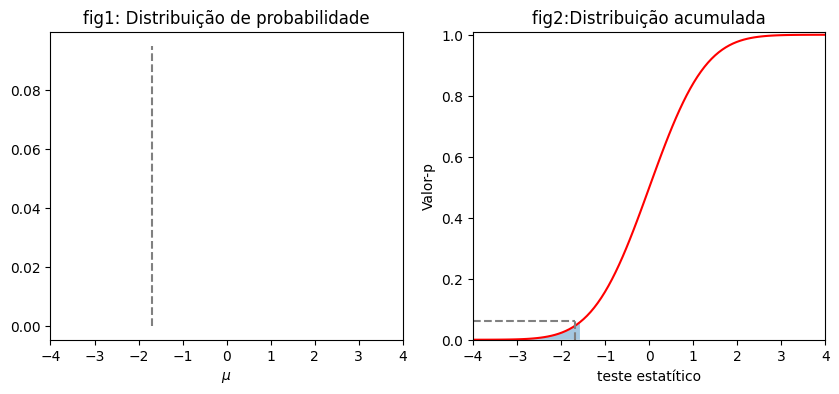

In [ ]:
x = np.linspace(-4,4,100)

y=stats.t.pdf(x,0,1);
c=norm.cdf(x,0,1)


fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(x,y,'r-');
ax[0].set_title('fig1: Distribuição de probabilidade')
ax[0].vlines(x=t,ymin=0,ymax=norm.pdf(t,0,1),color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))

#ax[0].set_ylim(0, max(y)*1.01)
ax[0].set_xlim(-4,4)
condicao = (x <= 0) & (y <= norm.pdf(t,0,1))
ax[0].fill_between(x, y,where=condicao,alpha=0.4);
ax[0].set_xlabel(r'$\mu$')


ax[1].plot(x,c,'r-');
ax[1].set_title('fig2:Distribuição acumulada')
ax[1].vlines(x=t,ymin=0,ymax=p_valor,color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))
ax[1].hlines(y=p_valor,xmin=-4,xmax=t,color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))
ax[1].set_ylim(0, max(c)*1.01)
ax[1].set_xlim(-4,4)
#preenchimento da região
ax[1].fill_between(x, c,where=c <= p_valor,alpha=0.4);
ax[1].set_xlabel('teste estatítico');
ax[1].set_ylabel('Valor-p');
if p_valor > 0.05:
  print('Não há evidência estatística para concluir que a média das notas é significativamente menor que 7')
else:
  print('Rejeitamos a hipótese nula. Portanto, há evidências estatísticas para concluir que \n a média das notas é significativamente menor que 7')


Desvio padrão: 0.38013155617496414
teste-t: -1.2478354962115579
p-valor: 0.10604565330558358
x_selc: 6.3700359139205
p-valor: 0.10604565330558358
z_score 6.937293222056786
Não há evidência estatística para concluir que a média das notas é significativamente menor que 7


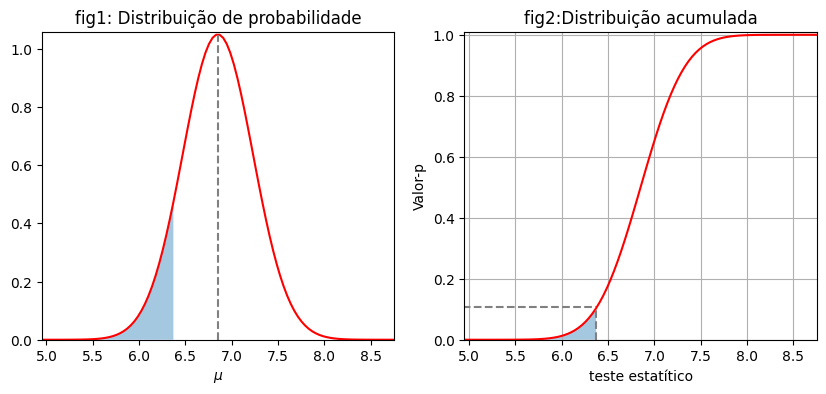

In [ ]:

print('Desvio padrão:',s)
print('teste-t:',t)
print('p-valor:',p_valor)


m=np.mean(notas)
s=np.std(notas)
xi=m-5*s
xf=m+5*s
x = np.linspace(xi,xf,100)

y=norm.pdf(x,m,s);

c=norm.cdf(x,m,s)
p_valor = norm.cdf(t)
x_selected = x[c <= p_valor]

print('x_selc:',x_selected[-1] )


print('p-valor:',p_valor)
p = 0.95/2
z_score = norm.ppf(p,7,1)
print('z_score',z_score)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(x,y,'r-');
ax[0].set_title('fig1: Distribuição de probabilidade')
ax[0].vlines(x=m,ymin=0,ymax=max(y),color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))

ax[0].set_ylim(0, max(y)*1.01)
ax[0].set_xlim(xi,xf)
condicao = (x <= x_selected[-1])
ax[0].fill_between(x, y,where=condicao,alpha=0.4);
ax[0].set_xlabel(r'$\mu$')


ax[1].plot(x,c,'r-');
ax[1].set_title('fig2:Distribuição acumulada')



#preenchimento da região
ax[1].vlines(x=x_selected[-1],ymin=0,ymax=p_valor,color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))
ax[1].hlines(y=p_valor,xmin=-4,xmax=x_selected[-1],color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))
ax[1].fill_between(x, c,where=c <= p_valor,alpha=0.4);
ax[1].set_ylim(0, max(c)*1.01)
ax[1].set_xlim(xi,xf)
ax[1].set_xlabel('teste estatítico');
ax[1].set_ylabel('Valor-p');
ax[1].grid()
if p_valor > 0.05:
  print('Não há evidência estatística para concluir que a média das notas é significativamente menor que 7')
else:
  print('Rejeitamos a hipótese nula. Portanto, há evidências estatísticas para concluir que \n a média das notas é significativamente menor que 7')


Nas duas figuras observamos o comportamento

In [ ]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from IPython.display import display, Math
from scipy import integrate


#Exemplo1. notas
#1)-As médias das notas é significamente diferente de 7?
#2) Ho=media das notas 7( mu)
#  H1 média é diferente de 7
#3)
notas = [6.5, 7.2, 6.8, 7.5, 6.9, 7.1, 6.7, 7.4, 6.6]
ho=7


#4)
t=(np.mean(notas)-ho)/np.std(notas)/np.sqrt(len(notas))

#5) P-valor. 3 situações

# bicaudal mu diferente ho   -- pvalue=2P(T>|t|) %nosso caso. pvalue=2P(T>0)) P=0
# a direira mu > h0          -- pvalue=P(T>t)
# a esquerda mu < ho         -- pvalue=P(T<t)

resultado = stats.ttest_1samp(notas, ho)

print("Estatística t:", resultado.statistic)
print("Valor-p:", resultado.pvalue)
print('Como o valor-p é maior que 0,05, não rejeitamos a hipótese nula')

#Estatística t: Mede quantos desvios padrão a média da amostra está distante do valor de referência.
#Como o valor-p é maior que 0,05, não rejeitamos a hipótese nula.
#Conclusão: Não há evidências suficientes para afirmar que a média das notas é diferente de 7.0.

Estatística t: -0.28284271247461795
Valor-p: 0.7844779352140983
Como o valor-p é maior que 0,05, não rejeitamos a hipótese nula


In [ ]:
#Exemplo3
#Da página 83 de Dalgaard [R267] , suponha que a ingestão diária
#de energia para 11 mulheres em Kj seja:

ingestao  =  np . array ([ 5260. ,  5470 ,  5640 ,  6180 ,  6390 ,  6515 ,
                          6805 ,  7515 , 7515 ,  8230 ,  8770 ])

ho=7725
med=np.mean(ingestao)
std=np.std(ingestao,ddof=1)
n=len(ingestao)
gl=len(ingestao)-1
s = np.random.standard_t(gl, size=10000) #distribuição
t = (np.mean(ingestao)-ho)/(ingestao.std(ddof=0)/np.sqrt(len(ingestao)))
p_value=np.sum(s<t) / float(len(s))

print('p-value',p_value)
resultado = stats.ttest_1samp(ingestao, ho)
print("Estatística t:", resultado.statistic)
print("Valor-p:", resultado.pvalue)
print('Como o valor-p é menor que 0,05, rejeitamos a hipótese nula')
print('Como o valor-p é menor que 0,05, rejeitamos a hipótese nula')



p-value 0.0072
Estatística t: -2.8207540608310193
Valor-p: 0.018137235176105812
Como o valor-p é menor que 0,05, rejeitamos a hipótese nula


In [ ]:
#Exemplo1 com n>500
np.random.seed(42)  # Para reproducibilidade
n=1000
notas = np.random.normal(7,1, size=n) # 1000 notas com média 7 e desvio padrão 1

# Valor de referência
ho = 7.0

# Realizar o teste t para uma amostra
resultado = stats.ttest_1samp(notas, ho)

# Exibir os resultados
print('t-student----------------------------------------------------------------')
print("Estatística t:", resultado.statistic)
print("Valor-p:", resultado.pvalue)

# Interpretação
alpha = 0.05  # Nível de significância
if resultado.pvalue < alpha:
    print("Rejeitamos a hipótese nula (H0). A média das notas é diferente de 7.0.")
else:
    print("Não rejeitamos a hipótese nula (H0). Não há evidências de que a média das notas seja diferente de 7.0.")
#USANDO TESTE Z, quando N grande

import numpy as np
from scipy import stats

# Desvio padrão populacional (conhecido)
std = 1.0

# Tamanho da amostra
n = len(notas)

# Calcular a estatística Z
media_amostra = np.mean(notas)
z = (media_amostra - ho) / (std / np.sqrt(n))

# Calcular o valor-p (teste bicaudal)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
#Calcular o valor-p (teste unicaudal à esquerda)
#p_value = norm.cdf(z)  # CDF da distribuição normal padrão
#Calcular o valor-p (teste unicaudal à esquerda)
#p_value = 1 - norm.cdf(z)

# Exibir os resultados
print('Z-test--------------------------------------------------------')

print("Estatística Z:", z)
print("Valor-p:", p_value)

# Interpretação
alpha = 0.05  # Nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula (H0). A média das notas é diferente de 7.0.")
else:
    print("Não rejeitamos a hipótese nula (H0). Não há evidências de que a média das notas seja diferente de 7.0.")





t-student----------------------------------------------------------------
Estatística t: 0.6243089585093
Valor-p: 0.5325672436623152
Não rejeitamos a hipótese nula (H0). Não há evidências de que a média das notas seja diferente de 7.0.
Z-test--------------------------------------------------------
Estatística Z: 0.6113332825206605
Valor-p: 0.5409789613993481
Não rejeitamos a hipótese nula (H0). Não há evidências de que a média das notas seja diferente de 7.0.


In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import norm

def teste_hipotese(amostra, valor_referencia, desvio_padrao_populacional=None, hipotese_alternativa='diferente'):
    """
    Realiza um teste de hipótese (Z-test ou t-test) com base na hipótese alternativa fornecida.

    Parâmetros:
        amostra (array-like): A amostra de dados.
        valor_referencia (float): O valor de referência para a hipótese nula (H0).
        desvio_padrao_populacional (float, opcional): O desvio padrão populacional (σ). Se não for fornecido, será usado o t-test.
        hipotese_alternativa (str): A hipótese alternativa. Pode ser 'maior', 'menor' ou 'diferente'.

    Retorna:
        None (os resultados são impressos diretamente).
    """
    # Tamanho da amostra
    n = len(amostra)

    # Média da amostra
    media_amostra = np.mean(amostra)

    # Verificar se o teste é Z ou t
    if desvio_padrao_populacional is not None:
        # Teste Z
        print("Usando o teste Z (desvio padrão populacional conhecido).")
        estatistica = (media_amostra - valor_referencia) / (desvio_padrao_populacional / np.sqrt(n))
        distribuição = norm  # Distribuição normal padrão
    else:
        # Teste t
        print("Usando o teste t (desvio padrão populacional desconhecido).")
        desvio_padrao_amostra = np.std(amostra, ddof=1)  # Desvio padrão amostral
        estatistica = (media_amostra - valor_referencia) / (desvio_padrao_amostra / np.sqrt(n))
        distribuição = stats.t(df=n-1)  # Distribuição t de Student

    # Calcular o valor-p com base na hipótese alternativa
    if hipotese_alternativa == 'maior':
        p_value = 1 - distribuição.cdf(estatistica)  # Teste unicaudal à direita
        tipo_teste = "unicaudal à direita"
    elif hipotese_alternativa == 'menor':
        p_value = distribuição.cdf(estatistica)  # Teste unicaudal à esquerda
        tipo_teste = "unicaudal à esquerda"
    elif hipotese_alternativa == 'diferente':
        p_value = 2 * (1 - distribuição.cdf(abs(estatistica)))  # Teste bicaudal
        tipo_teste = "bicaudal"
    else:
        raise ValueError("Hipótese alternativa inválida. Use 'maior', 'menor' ou 'diferente'.")

    # Exibir os resultados
    print(f"\nMédia da amostra: {media_amostra:.2f}")
    print(f"Estatística do teste: {estatistica:.2f}")
    print(f"Valor-p ({tipo_teste}): {p_value:.4f}")

    # Interpretação
    alpha = 0.05  # Nível de significância
    if p_value < alpha:
        print(f"Rejeitamos a hipótese nula (H0). A média da amostra é significativamente {hipotese_alternativa} que {valor_referencia}.")
    else:
        print(f"Não rejeitamos a hipótese nula (H0). Não há evidências de que a média da amostra seja {hipotese_alternativa} que {valor_referencia}.")


# Exemplo de uso
np.random.seed(42)  # Para reproducibilidade
notas = np.random.normal(7.0, 1.0, size=1000)  # 1000 notas com média 7.2 e desvio padrão 1

# # Teste 1: Verificar se a média é maior que 7.0 (unicaudal à direita)
# print("\nTeste 1: Média maior que 7.0")
# teste_hipotese(notas, valor_referencia=7.0, desvio_padrao_populacional=1.0, hipotese_alternativa='maior')

# # Teste 2: Verificar se a média é menor que 7.0 (unicaudal à esquerda)
# print("\nTeste 2: Média menor que 7.0")
# teste_hipotese(notas, valor_referencia=7.0, desvio_padrao_populacional=1.0, hipotese_alternativa='menor')

# Teste 3: Verificar se a média é diferente de 7.0 (bicaudal)
print("\nTeste 3: Média diferente de 7.0")
teste_hipotese(notas, valor_referencia=7.0, desvio_padrao_populacional=1.0, hipotese_alternativa='diferente')


Teste 3: Média diferente de 7.0
Usando o teste Z (desvio padrão populacional conhecido).

Média da amostra: 7.02
Estatística do teste: 0.61
Valor-p (bicaudal): 0.5410
Não rejeitamos a hipótese nula (H0). Não há evidências de que a média da amostra seja diferente que 7.0.


In [ ]:
# c=np.cumsum(y)
# c=c/max(c)
# id=np.where(x>=0.95)
# p=id[0][0]
# #print('cumsum   0.95:',c[p])
# #print('norm.cdf 0.95:',norm.cdf(0.95))

# plt.plot(x,norm.cdf(x))

# plt.plot(x,c,'--r')
# plt.grid()


# x = np.linspace(-3, 3, 1000)
# mu=0
# sig=1
# k=1/(sig*np.sqrt(2*ma.pi))
# Y=k*np.exp(-0.5*((x-mu)/sig)**2)
# C=np.cumsum(Y)
# C=C/max(C)
# plt.plot(x,C,'+g',alpha=0.1)

# id=np.where(x>=0.95)
# P=id[0][0]
# print('cumsum   0.95:',c[p])
# print('norm.cdf 0.95:',norm.cdf(0.95))
# print('CUMSUM   0.95:',C[P])


### 2) Valor-P unilateral à direita ($H_1: \mu>\mu_o$)
Aqui, testamos se a média amostral ( $\bar{x}$) é significamente maior que a média hipotética ($\mu_o$)

### 3) Valor-P unilateral à direita ($H_1: \mu \neq\mu_o$)
Aqui, testamos se a média amostral ( $\bar{x}$) é significamente diferente da média hipotética ($\mu_o$)




**Passos**
1) Para um teste bicaudal o valor-p é definido por:
$$P_{valor}= 2P(T>|t|)$$
Assim, como nosso valor t=0, chegamos que $P_{valor}= 2P(T>0)$.
Nosso primeiro calculo aqui é encontrar a probabilidade acumulada até o valor de t, assim encontrar $P(T <)$. Matematicamente estamos falando de uma expressão do tipo:
$$S(t)=\sum_{i=1}^{t} f(x_i)$$

Onde f(x) é nossa distribuição( seja ela qual for) e S(t) é nossa distribuição acumulada até o valor t definido.Nada tao complicado.

Em python a operação é bem simples, podemos usar o recurso de soma acumulada *np.cumsum* em nossa distribuição e encontrar nossa soma acumulada até o valor
t=0. o código abaixo exemplifica esta tarefa.

In [ ]:
notas=[6.5, 6, 6.8, 7.5, 4, 7.1, 6.7, 7.4, 6.6, 4] , desvio= 1.20349,média=6.26
muo=7
ho=7
#calcular média e desvio das amostas

x=np.mean(notas)
s=np.std(notas)
t=(x-ho)/(s/np.sqrt(len(notas)))
print('Média:',x)
print('Desvio padrão:',s)
print('teste-t:',t)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-55-f2aae6ce7fd7>, line 1)

In [ ]:
m=np.mean(notas)
s=np.std(notas)
xi=m-5*s
xf=m+5*s
x = np.linspace(xi,xf,100)

y=norm.pdf(x,m,s);


c=norm.cdf(x,m,s)
p_valor = norm.cdf(97.5)
x_selected = x[c <= p_valor]

# print('p-valor:',p_valor)
# fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# ax[0].plot(x,y,'r-');
# ax[0].set_title('fig1: Distribuição de probabilidade')
# ax[0].vlines(x=m,ymin=0,ymax=max(y),color='gray',linestyles='dashed',
#      label="mean: {:.1f}".format(t))

# ax[0].set_ylim(0, max(y)*1.01)
# ax[0].set_xlim(xi,xf)
# condicao = (x <= x_selected[-1])
# ax[0].fill_between(x, y,where=condicao,alpha=0.4);
# ax[0].set_xlabel(r'$\mu$')


# ax[1].plot(x,c,'r-');
# ax[1].set_title('fig2:Distribuição acumulada')



# #preenchimento da região
# ax[1].vlines(x=x_selected[-1],ymin=0,ymax=p_valor,color='gray',linestyles='dashed',
#      label="mean: {:.1f}".format(t))
# ax[1].hlines(y=p_valor,xmin=-4,xmax=x_selected[-1],color='gray',linestyles='dashed',
#      label="mean: {:.1f}".format(t))
# ax[1].fill_between(x, c,where=c <= p_valor,alpha=0.4);
# ax[1].set_ylim(0, max(c)*1.01)
# ax[1].set_xlim(xi,xf)
# ax[1].set_xlabel('teste estatítico');
# ax[1].set_ylabel('Valor-p');
# ax[1].grid()
# if p_valor > 0.05:
#   print('Não há evidência estatística para concluir que a média das notas é significativamente menor que 7')
# else:
#   print('Rejeitamos a hipótese nula. Portanto, há evidências estatísticas para concluir que \n a média das notas é significativamente menor que 7')

#print(a)

6.937293222056786


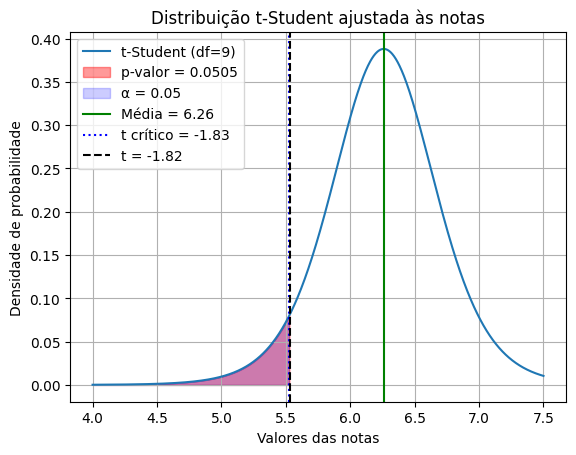

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parâmetros
df = 9  # Graus de liberdade
t_value = -1.82  # Estatística t calculada
p_value = 0.0505  # p-valor
alpha = 0.05  # Nível de significância
t_critical = t.ppf(alpha, df)  # Valor crítico de t

# Intervalo das notas
notas = [6.5, 6, 6.8, 7.5, 4, 7.1, 6.7, 7.4, 6.6, 4]
x_min = min(notas)  # Valor mínimo das notas
x_max = max(notas)  # Valor máximo das notas

# Gerar valores de x para o gráfico
x = np.linspace(x_min, x_max, 1000)

# Calcular a média e o desvio padrão das notas
media = np.mean(notas)
desvio_padrao = np.std(notas, ddof=1)  # ddof=1 para desvio padrão amostral

# Gerar valores da distribuição t-Student ajustados ao eixo x
y = t.pdf((x - media) / (desvio_padrao / np.sqrt(len(notas))), df)

# Plotar a distribuição t-Student ajustada
plt.plot(x, y, label=f"t-Student (df={df})")

# Preencher a área correspondente ao p-valor
p_valor_x = x[x <= media + t_value * (desvio_padrao / np.sqrt(len(notas)))]
plt.fill_between(p_valor_x, t.pdf((p_valor_x - media) / (desvio_padrao / np.sqrt(len(notas))), df), color='red', alpha=0.4, label=f"p-valor = {p_value:.4f}")

# Preencher a área correspondente ao nível de significância (α = 0.05)
alpha_x = x[x <= media + t_critical * (desvio_padrao / np.sqrt(len(notas)))]
plt.fill_between(alpha_x, t.pdf((alpha_x - media) / (desvio_padrao / np.sqrt(len(notas))), df), color='blue', alpha=0.2, label=f"α = {alpha}")

# Linha vertical para a média das notas
plt.axvline(media, color='green', linestyle='-', label=f"Média = {media:.2f}")

# Linha vertical para o valor crítico de t
t_critical_x = media + t_critical * (desvio_padrao / np.sqrt(len(notas)))
plt.axvline(t_critical_x, color='blue', linestyle=':', label=f"t crítico = {t_critical:.2f}")

# Linha vertical para a estatística t calculada
t_value_x = media + t_value * (desvio_padrao / np.sqrt(len(notas)))
plt.axvline(t_value_x, color='black', linestyle='--', label=f"t = {t_value:.2f}")

# Configurações do gráfico
plt.title("Distribuição t-Student ajustada às notas")
plt.xlabel("Valores das notas")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid()
plt.show()

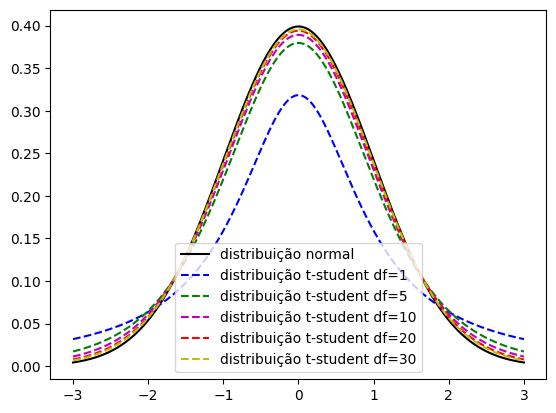

In [ ]:
from scipy.stats import t

x = np.linspace(-3,3,1000)
df=1
yt1=t.pdf(x,1)   # distribuição t-student
yt5=t.pdf(x,5)   # distribuição t-student
yt10=t.pdf(x,10)   # distribuição t-student
yt20=t.pdf(x,20)   # distribuição t-student
yt30=t.pdf(x,30)



yn=norm.pdf(x)   # distribuição normal
plt.plot(x,yn,'k',label='distribuição normal')

plt.plot(x,yt1,'b--',label='distribuição t-student df=1')
plt.plot(x,yt5,'g--',label='distribuição t-student df=5')
plt.plot(x,yt10,'m--',label='distribuição t-student df=10')
plt.plot(x,yt20,'r--',label='distribuição t-student df=20')
plt.plot(x,yt30,'y--',label='distribuição t-student df=30')
plt.legend()
